In [4]:
#EDA Packages
import pandas as pd
import numpy as np

In [5]:
# Plotting Packages
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# ML Packages
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [40]:
#load the dataset
df=pd.read_csv('train.csv')

In [41]:
df.head(10)

,player_id,name,age,gender,country,height,weight,ball_controlling_skills,body_reflexes,body_balance,...,strong_foot,behaviour_rating,matches_played,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications,selection
0,PLID_4964,Keva Horan,23,M,Ukraine,6'2,176lbs,77.0,58.0,47.0,...,Right,7.7,NaN,8.1,2.0,High,Talent Hunt,8.0,0.0,1
1,PLID_11234,Herma Tann,18,M,Russia,5'10,148lbs,54.0,69.0,70.0,...,Any,5.3,0.0,NaN,3.0,Medium,Source,3.0,0.0,0
2,PLID_19127,Eilene Kizer,16,F,Spain,6'2,172lbs,34.0,43.0,45.0,...,Left,4.7,0.0,6.6,5.0,Low,Academy,2.0,0.0,1
3,PLID_17467,Andrea Badgett,27,M,Chile,5'11,165lbs,79.0,73.0,76.0,...,Right,8.6,113.0,8.6,6.0,Medium,Academy,13.0,16.0,1
4,PLID_9661,Jeremiah Bumbalough,19,F,Argentina,5'8,158lbs,47.0,61.0,74.0,...,Right,NaN,0.0,5.7,5.0,Medium,Academy,4.0,0.0,0
5,PLID_10351,Tandra Tijerina,21,M,Guinea,6'0,174lbs,63.0,69.0,65.0,...,Right,6.3,0.0,6.9,3.0,Medium,Academy,7.0,0.0,0
6,PLID_21799,Narcisa Garnes,24,F,China PR,5'10,148lbs,64.0,68.0,71.0,...,Left,6.9,1.0,7.3,2.0,High,Academy,10.0,0.0,0
7,PLID_20082,Joyce Boxx,21,F,United States,5'11,168lbs,58.0,60.0,57.0,...,Right,5.9,1.0,6.8,5.0,Medium,Talent Hunt,6.0,0.0,1
8,PLID_22917,Josette Mcgrew,25,M,Italy,6'0,176lbs,67.0,70.0,58.0,...,Right,6.9,0.0,8.2,2.0,Medium,Academy,11.0,0.0,1
9,PLID_9364,Hai Brandel,16,M,Belgium,6'2,183lbs,49.0,56.0,61.0,...,Right,4.7,0.0,6.1,2.0,Medium,Unknown,2.0,0.0,1


In [42]:
print ('Shape of the given dataset is {}.Contains {} rows and {} columns '.format(df.shape,df.shape[0],df.shape[1]))

Shape of the given dataset is (13994, 30).Contains 13994 rows and 30 columns 


# Feature Names and its Datatypes

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13994 entries, 0 to 13993
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   player_id                  13994 non-null  object 
 1   name                       13994 non-null  object 
 2   age                        13994 non-null  int64  
 3   gender                     13975 non-null  object 
 4   country                    13994 non-null  object 
 5   height                     13994 non-null  object 
 6   weight                     13577 non-null  object 
 7   ball_controlling_skills    13581 non-null  float64
 8   body_reflexes              13994 non-null  float64
 9   body_balance               13994 non-null  float64
 10  jumping_skills             13970 non-null  float64
 11  penalties_conversion_rate  13964 non-null  float64
 12  mental_strength            13966 non-null  float64
 13  goalkeeping_skills         13994 non-null  flo

In [44]:
#AS Playerid , Name and country has no impact for selection prediction dropping them
df.drop(["player_id","name","country"],axis=1,inplace=True)

# Data Spliting
#Select and separately store Numerical and Categorical features in different variables.

In [45]:

##Selecting numerical features
numerical_data = df.select_dtypes(include='number')
#append the features of numerical_data to list
numerical_features=numerical_data.columns.tolist()

print(f'There are {len(numerical_features)} numerical features:', '\n')
print(numerical_features)

There are 21 numerical features: 

['age', 'ball_controlling_skills', 'body_reflexes', 'body_balance', 'jumping_skills', 'penalties_conversion_rate', 'mental_strength', 'goalkeeping_skills', 'defending_skills', 'passing_skills', 'dribbling_skills', 'shot_accuracy', 'body_strength_stamina', 'max_running_speed', 'behaviour_rating', 'matches_played', 'fitness_rating', 'trophies_won', 'years_of_experience', 'no_of_disqualifications', 'selection']


In [46]:
#Selecting categoricalfeatures
categorical_data=df.select_dtypes(include= 'object')
#append the features of categorical_data to list
categorical_features=categorical_data.columns.tolist()

print(f'There are {len(categorical_features)} categorical features:', '\n')
print(categorical_features)

There are 6 categorical features: 

['gender', 'height', 'weight', 'strong_foot', 'dedication_level', 'coaching']


# Descriptive Analysis
In descriptive Analysis we analysis each variable separately to get inference about the feature.


In [47]:
numerical_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,13994.0,21.135844,5.162719,16.0,17.0,20.0,24.0,61.0
ball_controlling_skills,13581.0,56.043958,16.787353,5.0,51.0,61.0,67.0,95.0
body_reflexes,13994.0,61.934329,14.931963,12.0,54.0,64.0,72.0,96.0
body_balance,13994.0,62.753323,14.203638,9.0,55.0,65.0,73.0,97.0
jumping_skills,13970.0,63.612026,11.938712,14.0,57.0,64.0,72.0,95.0
penalties_conversion_rate,13964.0,48.495703,15.767506,7.0,39.0,49.0,60.0,92.0
mental_strength,13966.0,56.768366,11.977744,9.0,49.0,58.0,65.0,92.0
goalkeeping_skills,13994.0,16.474632,16.874551,1.0,10.0,11.0,12.0,88.0
defending_skills,13994.0,48.108118,16.821929,9.0,36.0,52.0,61.0,86.0
passing_skills,13994.0,52.935973,14.201782,13.0,45.0,56.0,63.0,89.0


In [48]:
#Summary satistics of Categorical features
categorical_data.describe(include='object').T

,count,unique,top,freq
gender,13975,2,M,6992
height,13994,31,6'0,2251
weight,13577,88,165lbs,1106
strong_foot,13442,4,Right,8359
dedication_level,13994,3,Medium,9704
coaching,13869,4,Academy,9390


In [49]:
#Variance of each numerical features
numerical_data.var()

age                            26.653667
ball_controlling_skills       281.815225
body_reflexes                 222.963528
body_balance                  201.743334
jumping_skills                142.532836
penalties_conversion_rate     248.614248
mental_strength               143.466356
goalkeeping_skills            284.750482
defending_skills              282.977304
passing_skills                201.690605
dribbling_skills               94.775075
shot_accuracy                 249.766118
body_strength_stamina         132.538259
max_running_speed              26.981653
behaviour_rating                1.200563
matches_played                184.504114
fitness_rating                  2.913789
trophies_won                    2.921202
years_of_experience            19.810993
no_of_disqualifications      5187.406983
selection                       0.246709
dtype: float64

In [50]:
#Skew in numerical features
numerical_data.skew()

age                           2.177334
ball_controlling_skills      -1.216855
body_reflexes                -0.575091
body_balance                 -0.603426
jumping_skills               -0.423145
penalties_conversion_rate    -0.371393
mental_strength              -0.462343
goalkeeping_skills            2.502611
defending_skills             -0.522252
passing_skills               -0.623124
dribbling_skills             -1.040802
shot_accuracy                -0.664315
body_strength_stamina        -0.602096
max_running_speed            -0.849923
behaviour_rating             -0.114917
matches_played                4.361512
fitness_rating               -0.883006
trophies_won                  0.126066
years_of_experience           0.661366
no_of_disqualifications     -13.725532
selection                    -0.231662
dtype: float64

# Observation
## 1.Features such as age,goal keeping skills, matches played has high positive skew ranges.
## 2.And no_of disqualifications has high negative skew.
## 3.Rest of features shows moderate range of positive and negative skew.

# Histograms
To find the distributions and outlier in the each feature

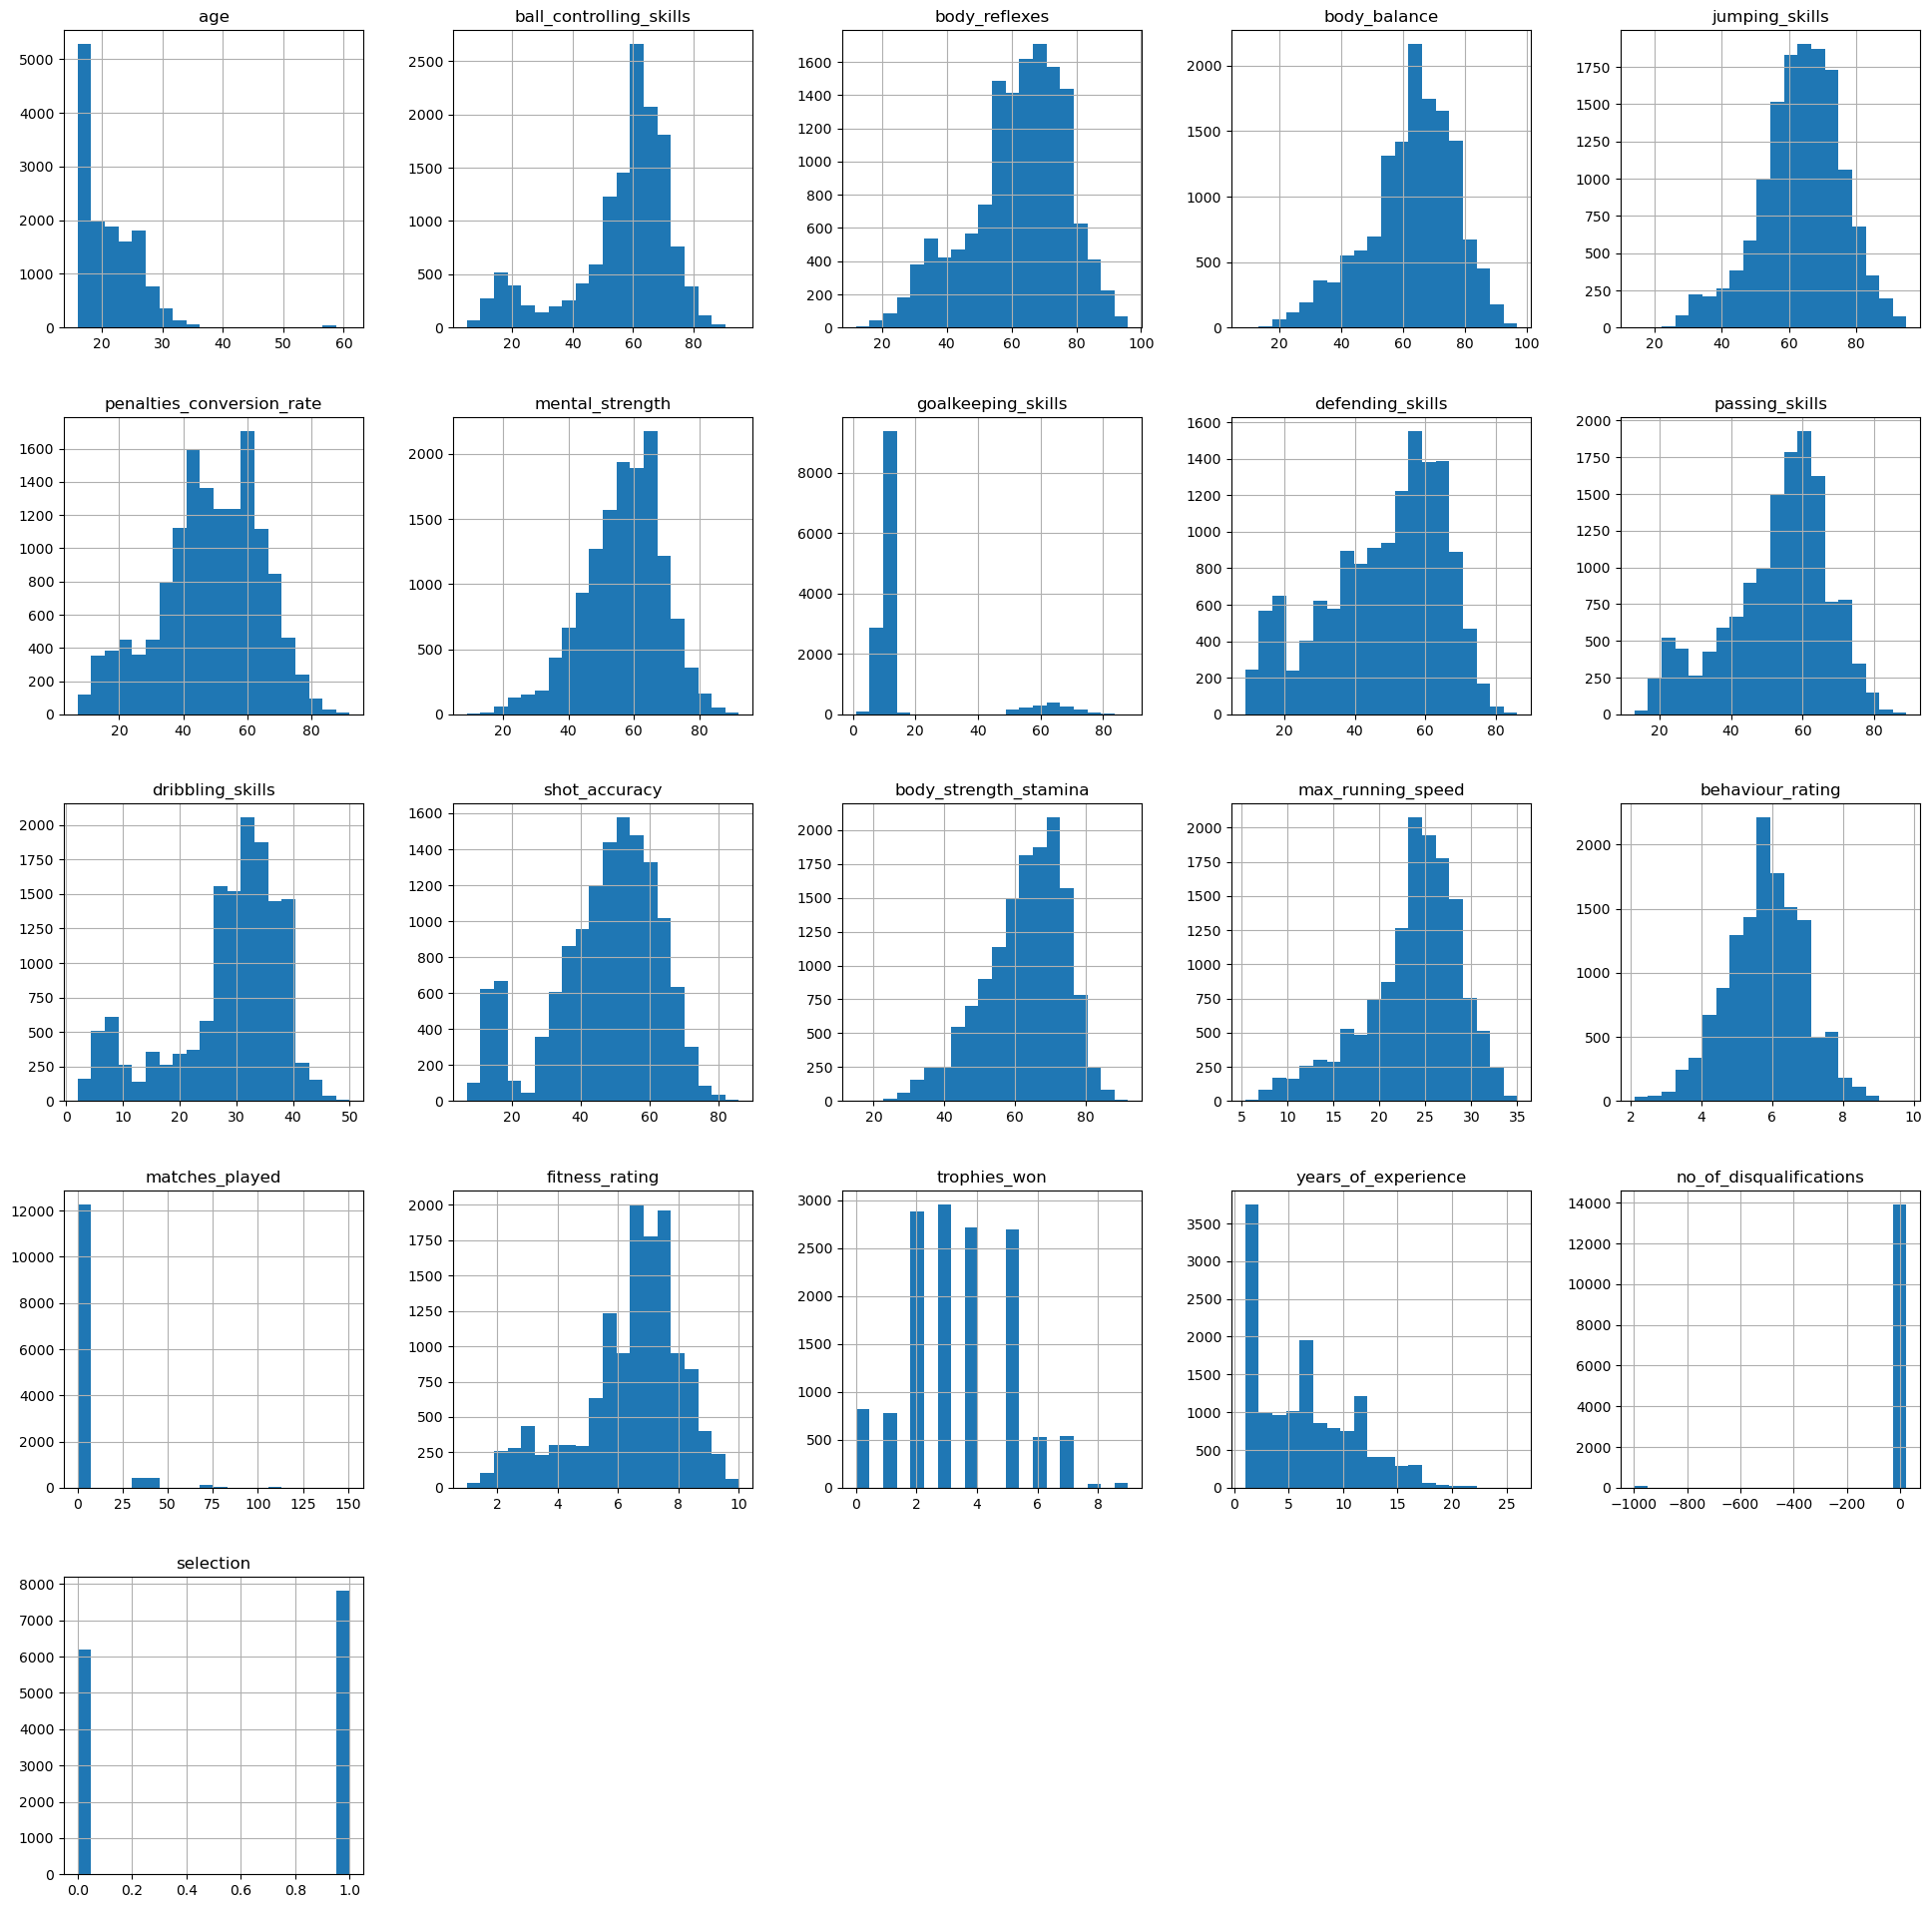

In [51]:
numerical_data.hist(figsize=(24,24),bins=20)
plt.show()

# Number Unique values in each feature

In [52]:
numerical_data.nunique()


age                           39
ball_controlling_skills       89
body_reflexes                 84
body_balance                  86
jumping_skills                74
penalties_conversion_rate     86
mental_strength               83
goalkeeping_skills            65
defending_skills              78
passing_skills                77
dribbling_skills              48
shot_accuracy                 79
body_strength_stamina         73
max_running_speed            166
behaviour_rating              64
matches_played                18
fitness_rating                85
trophies_won                  10
years_of_experience           25
no_of_disqualifications       17
selection                      2
dtype: int64

In [53]:
#Missing Values
numerical_data.isnull().sum()


age                            0
ball_controlling_skills      413
body_reflexes                  0
body_balance                   0
jumping_skills                24
penalties_conversion_rate     30
mental_strength               28
goalkeeping_skills             0
defending_skills               0
passing_skills                 0
dribbling_skills               0
shot_accuracy                572
body_strength_stamina          0
max_running_speed              0
behaviour_rating             703
matches_played               666
fitness_rating               695
trophies_won                   0
years_of_experience          144
no_of_disqualifications        0
selection                      0
dtype: int64

# Observations
## 1.selection field contains 2 unique values but rest of the features show more variations.
## Hence selection field will be our target variable
## 2.below fields contains missing values so we need to use of any statistical imputations.
## ball_controlling_skills,years_of_experience,
## fitness_rating,matches_played,behaviour_rating,shot_accuracy, 
## mental_strength,penalties_conversion_rate,jumping_skills
## 3. Except matches_played, trophies won and no_of_disqualifiactions all other features shows gaussian like distribution

# Categorical Features
No of unique values in each categorical feature

In [55]:
# unique values counts
unique_counts=categorical_data.nunique()

for index,i in enumerate(range(6),start=1):
    print(index,"{a} has {b} unique values".format(a=categorical_features[i],b=unique_counts[i]))

1 gender has 2 unique values
2 height has 31 unique values
3 weight has 88 unique values
4 strong_foot has 4 unique values
5 dedication_level has 3 unique values
6 coaching has 4 unique values



gender



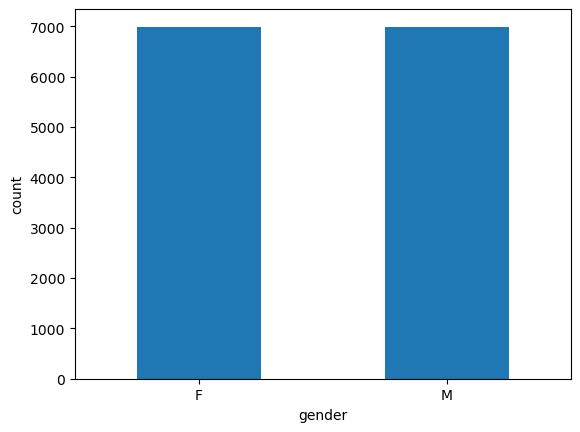


height



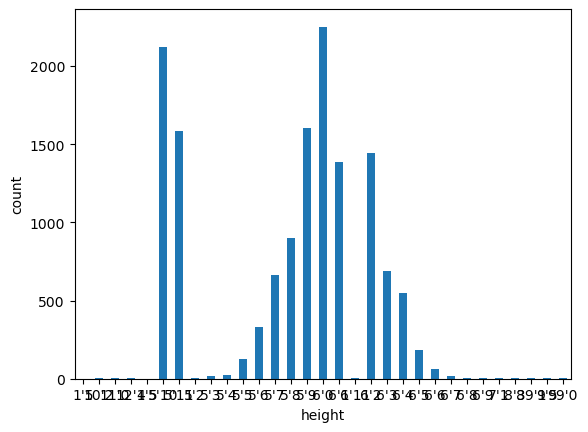


weight



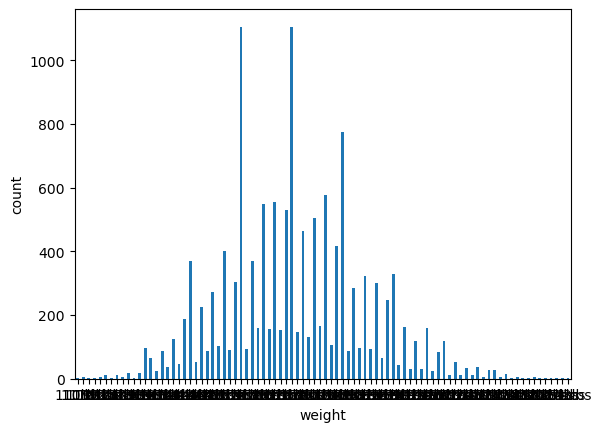


strong_foot



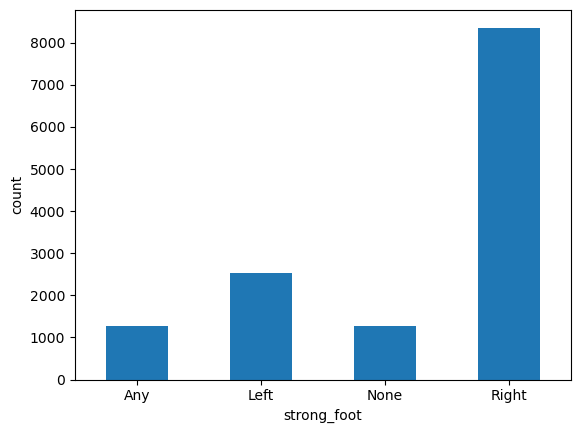


dedication_level



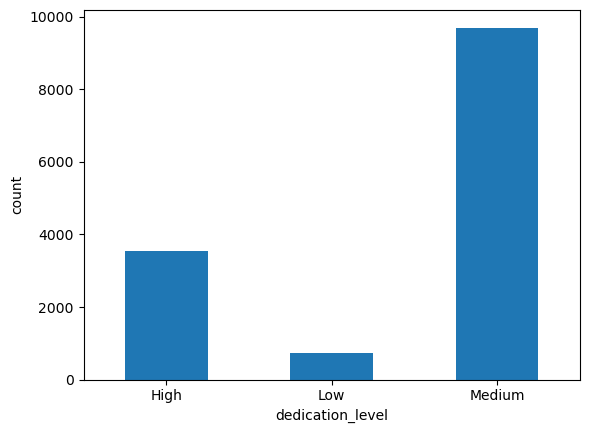


coaching



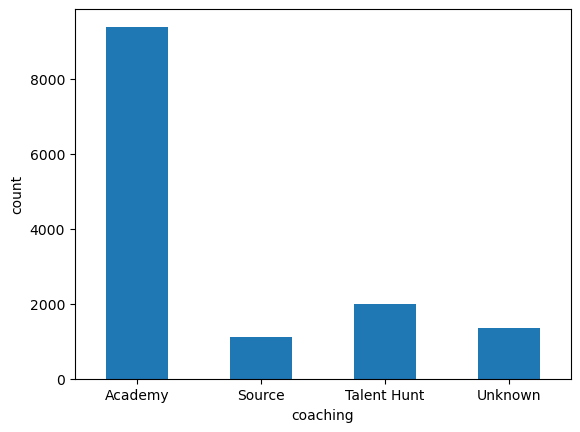

In [56]:
#through Looping generate bar plots of unqiue value counts in each variable
for col in categorical_features:
    print()
    print(f"\033[1m{col}\033[0m\n") #print column name above the plot
    categorical_data[col].value_counts().sort_index().plot(kind='bar', rot=0, xlabel=col,ylabel='count')
    plt.show()

# Observations
From the barplots of unique values in each categorical features shows how balanced those unique values in that specific feature.

# Correlation Analysis
Correlation matrix of whole dataset

In [58]:

# Generating correlation coefficient between each features
from pandas import set_option
set_option("display.precision",3)
correlation=df.corr(method='pearson')
correlation

/var/folders/_n/1lkh44610574_m504zly5jx00000gp/T/ipykernel_91147/3841510677.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=df.corr(method='pearson')


,age,ball_controlling_skills,body_reflexes,body_balance,jumping_skills,penalties_conversion_rate,mental_strength,goalkeeping_skills,defending_skills,passing_skills,...,shot_accuracy,body_strength_stamina,max_running_speed,behaviour_rating,matches_played,fitness_rating,trophies_won,years_of_experience,no_of_disqualifications,selection
age,1.000,0.083,-0.009,-0.058,0.144,0.124,0.315,0.077,0.157,0.154,...,0.149,0.201,-0.131,0.374,0.211,0.079,0.031,0.841,-0.011,-0.162
ball_controlling_skills,0.083,1.000,0.702,0.604,0.205,0.770,0.698,-0.788,0.600,0.897,...,0.897,0.552,0.685,0.457,0.213,0.724,0.272,0.092,-0.008,0.266
body_reflexes,-0.009,0.702,1.000,0.761,0.226,0.564,0.450,-0.537,0.297,0.672,...,0.657,0.276,0.798,0.284,0.088,0.572,0.236,-0.021,-0.016,0.163
body_balance,-0.058,0.604,0.761,1.000,0.201,0.486,0.338,-0.520,0.289,0.584,...,0.542,0.129,0.687,0.159,0.041,0.483,0.198,-0.075,-0.013,0.101
jumping_skills,0.144,0.205,0.226,0.201,1.000,0.136,0.264,-0.205,0.326,0.158,...,0.187,0.404,0.245,0.267,0.113,0.363,0.057,0.156,-0.011,0.085
penalties_conversion_rate,0.124,0.770,0.564,0.486,0.136,1.000,0.569,-0.632,0.306,0.691,...,0.873,0.392,0.543,0.354,0.213,0.519,0.248,0.142,-0.012,0.177
mental_strength,0.315,0.698,0.450,0.338,0.264,0.569,1.000,-0.424,0.522,0.712,...,0.685,0.529,0.384,0.665,0.363,0.544,0.228,0.368,-0.002,0.319
goalkeeping_skills,0.077,-0.788,-0.537,-0.520,-0.205,-0.632,-0.424,1.000,-0.660,-0.661,...,-0.718,-0.546,-0.626,-0.079,-0.005,-0.704,-0.177,0.098,0.014,-0.047
defending_skills,0.157,0.600,0.297,0.289,0.326,0.306,0.522,-0.660,1.000,0.637,...,0.465,0.680,0.335,0.390,0.157,0.700,0.100,0.178,0.001,0.154
passing_skills,0.154,0.897,0.672,0.584,0.158,0.691,0.712,-0.661,0.637,1.000,...,0.849,0.501,0.595,0.513,0.255,0.686,0.265,0.179,-0.008,0.258


/var/folders/_n/1lkh44610574_m504zly5jx00000gp/T/ipykernel_91147/3247364276.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), ax=ax, annot=True)


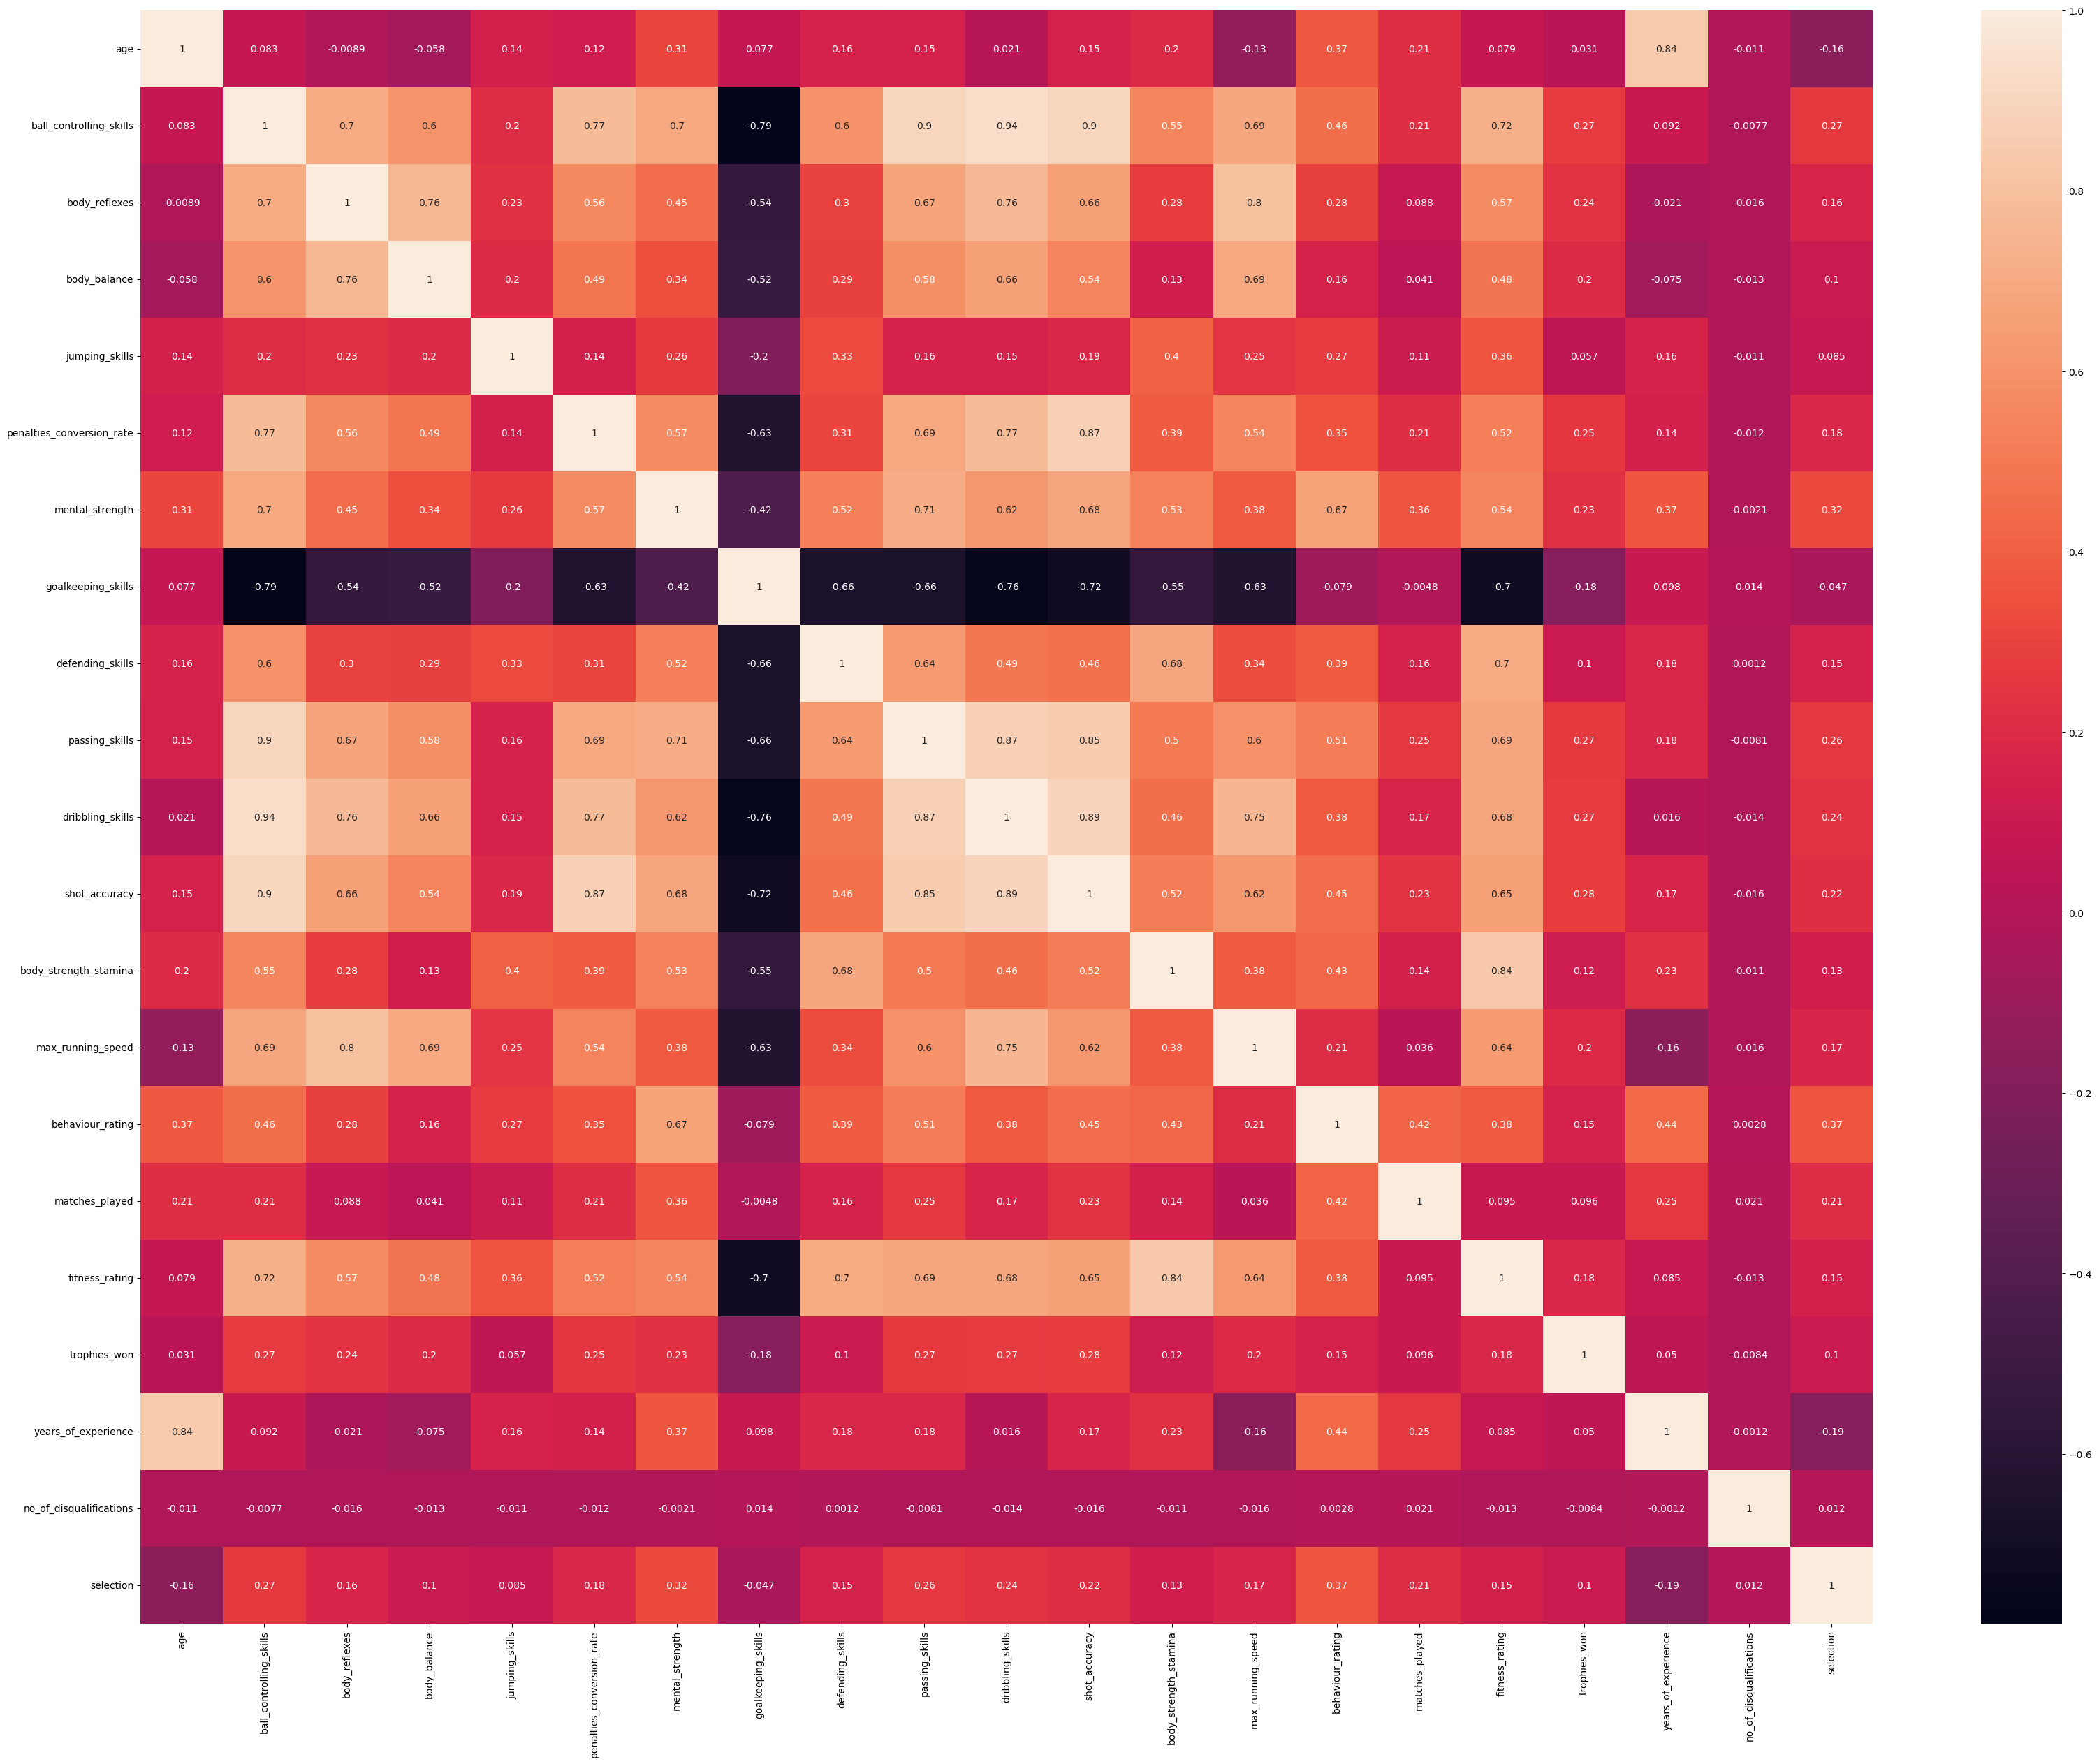

In [59]:
#Correlation Heatmap plot of whole dataset
# Plot correlation matrix in heatmap
fig, ax = plt.subplots(figsize=(40, 30))
sns.heatmap(df.corr(), ax=ax, annot=True)
plt.show()

# Data visualization
Some other visualizations of features to get more insights

Density plots of numerical features

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

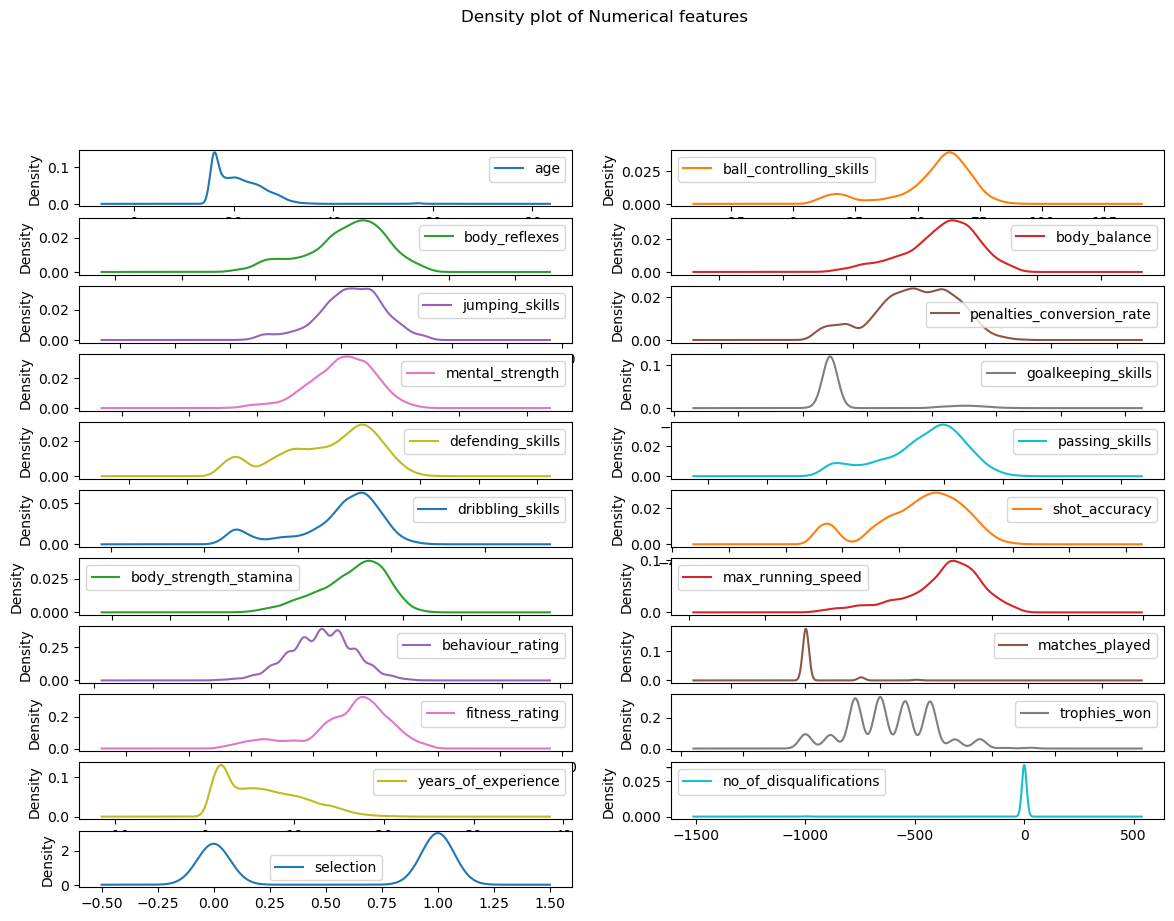

In [60]:
numerical_data.plot(kind='density',figsize=(14,14),subplots=True,layout=(16,2),title="Density plot of Numerical features",sharex=False)

# Data Preprocessing

# Checking for missing values

In [65]:
df.isnull().sum()

age                            0
gender                        19
height                         0
weight                       417
ball_controlling_skills      413
body_reflexes                  0
body_balance                   0
jumping_skills                24
penalties_conversion_rate     30
mental_strength               28
goalkeeping_skills             0
defending_skills               0
passing_skills                 0
dribbling_skills               0
shot_accuracy                572
body_strength_stamina          0
max_running_speed              0
strong_foot                  552
behaviour_rating             703
matches_played               666
fitness_rating               695
trophies_won                   0
dedication_level               0
coaching                     125
years_of_experience          144
no_of_disqualifications        0
selection                      0
dtype: int64

In [66]:
##dealing with categorical null values
cols=df[['gender', 'weight', 'strong_foot', 'coaching']]
for i in cols:
    df[i].fillna(df[i].mode().iloc[0], inplace=True)

In [67]:
#checking null for categorical columns
df.isnull().sum()

age                            0
gender                         0
height                         0
weight                         0
ball_controlling_skills      413
body_reflexes                  0
body_balance                   0
jumping_skills                24
penalties_conversion_rate     30
mental_strength               28
goalkeeping_skills             0
defending_skills               0
passing_skills                 0
dribbling_skills               0
shot_accuracy                572
body_strength_stamina          0
max_running_speed              0
strong_foot                    0
behaviour_rating             703
matches_played               666
fitness_rating               695
trophies_won                   0
dedication_level               0
coaching                       0
years_of_experience          144
no_of_disqualifications        0
selection                      0
dtype: int64

In [68]:
##dealing with numerical values
n_cols =df[['ball_controlling_skills', 'jumping_skills', 'penalties_conversion_rate', 'mental_strength', 'shot_accuracy', 'behaviour_rating', 'matches_played', 'fitness_rating', 'years_of_experience']]
for i in n_cols:
    df[i].fillna(df[i].mean(), inplace=True)

In [69]:
#checking for null
df.isnull().sum()

age                          0
gender                       0
height                       0
weight                       0
ball_controlling_skills      0
body_reflexes                0
body_balance                 0
jumping_skills               0
penalties_conversion_rate    0
mental_strength              0
goalkeeping_skills           0
defending_skills             0
passing_skills               0
dribbling_skills             0
shot_accuracy                0
body_strength_stamina        0
max_running_speed            0
strong_foot                  0
behaviour_rating             0
matches_played               0
fitness_rating               0
trophies_won                 0
dedication_level             0
coaching                     0
years_of_experience          0
no_of_disqualifications      0
selection                    0
dtype: int64

# Label Encoding

In [79]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])

In [80]:
df['height'] = le.fit_transform(df['height'])

In [81]:
df['weight'] = le.fit_transform(df['weight'])

In [82]:
df['strong_foot'] = le.fit_transform(df['strong_foot'])

In [83]:
df['dedication_level'] = le.fit_transform(df['dedication_level'])

In [84]:
df['coaching'] = le.fit_transform(df['coaching'])

In [85]:
df.head()

,age,gender,height,weight,ball_controlling_skills,body_reflexes,body_balance,jumping_skills,penalties_conversion_rate,mental_strength,...,strong_foot,behaviour_rating,matches_played,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications,selection
0,23,1,18,47,77.0,58.0,47.0,59.0,41.0,73.0,...,3,7.700,3.908,8.100,2.0,0,2,8.0,0.0,1
1,18,1,5,24,54.0,69.0,70.0,62.0,53.0,43.0,...,0,5.300,0.000,6.405,3.0,2,1,3.0,0.0,0
2,16,0,18,44,34.0,43.0,45.0,69.0,49.0,45.0,...,1,4.700,0.000,6.600,5.0,1,0,2.0,0.0,1
3,27,1,6,38,79.0,73.0,76.0,86.0,81.0,80.0,...,3,8.600,113.000,8.600,6.0,2,0,13.0,16.0,1
4,19,0,13,32,47.0,61.0,74.0,57.0,49.0,35.0,...,3,5.822,0.000,5.700,5.0,2,0,4.0,0.0,0


# Min Max Scaling

In [86]:
x = df.drop('selection',axis=1)

In [87]:
y = df['selection']

In [88]:
from sklearn.preprocessing import MinMaxScaler

In [89]:
# Create the MinMaxScaler object
scaler = MinMaxScaler()

In [90]:
# Fit and transform the data to perform Min-Max scaling
x_scaled = scaler.fit_transform(x)

In [91]:
x_scaled=pd.DataFrame(x_scaled,columns=x.columns)

In [92]:
x_scaled.head()

,age,gender,height,weight,ball_controlling_skills,body_reflexes,body_balance,jumping_skills,penalties_conversion_rate,mental_strength,...,max_running_speed,strong_foot,behaviour_rating,matches_played,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications
0,0.156,1.0,0.600,0.540,0.800,0.548,0.432,0.556,0.400,0.771,...,0.642,1.000,0.727,0.026,0.789,0.222,0.0,0.667,0.28,0.976
1,0.044,1.0,0.167,0.276,0.544,0.679,0.693,0.593,0.541,0.410,...,0.581,0.000,0.416,0.000,0.601,0.333,1.0,0.333,0.08,0.976
2,0.000,0.0,0.600,0.506,0.322,0.369,0.409,0.679,0.494,0.434,...,0.601,0.333,0.338,0.000,0.622,0.556,0.5,0.000,0.04,0.976
3,0.244,1.0,0.200,0.437,0.822,0.726,0.761,0.889,0.871,0.855,...,0.534,1.000,0.844,0.748,0.844,0.667,1.0,0.000,0.48,0.991
4,0.067,0.0,0.433,0.368,0.467,0.583,0.739,0.531,0.494,0.313,...,0.608,1.000,0.483,0.000,0.522,0.556,1.0,0.000,0.12,0.976


In [101]:
x_scaled.columns

Index(['age', 'gender', 'height', 'weight', 'ball_controlling_skills',
       'body_reflexes', 'body_balance', 'jumping_skills',
       'penalties_conversion_rate', 'mental_strength', 'goalkeeping_skills',
       'defending_skills', 'passing_skills', 'dribbling_skills',
       'shot_accuracy', 'body_strength_stamina', 'max_running_speed',
       'strong_foot', 'behaviour_rating', 'matches_played', 'fitness_rating',
       'trophies_won', 'dedication_level', 'coaching', 'years_of_experience',
       'no_of_disqualifications'],
      dtype='object')

## Train test split

In [103]:
from sklearn.model_selection import train_test_split

In [104]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

# Modelling using different Algorithms

# Logistic Regression model

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [106]:
# Train the Logistic Regression model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(x_train, y_train)

/Users/zainal.hameed/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [107]:
# Make predictions on the test set
lr_y_pred = lr_model.predict(x_test)

In [108]:
# Evaluate the model
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, lr_y_pred))
print(classification_report(y_test, lr_y_pred))

Logistic Regression:
Accuracy: 0.7745623436941765
              precision    recall  f1-score   support

           0       0.78      0.71      0.74      1286
           1       0.77      0.83      0.80      1513

    accuracy                           0.77      2799
   macro avg       0.78      0.77      0.77      2799
weighted avg       0.77      0.77      0.77      2799



# Decision Tree

In [109]:
from sklearn.tree import DecisionTreeClassifier

In [110]:
# Train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [111]:
# Make predictions on the test set
dt_y_pred = dt_model.predict(x_test)


In [112]:
# Evaluate the model
print("Decision Tree:")
print("Accuracy:", accuracy_score(y_test, dt_y_pred))
print(classification_report(y_test, dt_y_pred))

Decision Tree:
Accuracy: 0.7888531618435155
              precision    recall  f1-score   support

           0       0.78      0.75      0.77      1286
           1       0.80      0.82      0.81      1513

    accuracy                           0.79      2799
   macro avg       0.79      0.79      0.79      2799
weighted avg       0.79      0.79      0.79      2799



# Random Forest

In [113]:
from sklearn.ensemble import RandomForestClassifier

In [114]:
# Train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [115]:
# Make predictions on the test set
rf_y_pred = rf_model.predict(x_test)

In [116]:
# Evaluate the model
print("Random Forest:")
print("Accuracy:", accuracy_score(y_test, rf_y_pred))
print(classification_report(y_test, rf_y_pred))

Random Forest:
Accuracy: 0.8542336548767417
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1286
           1       0.85      0.88      0.87      1513

    accuracy                           0.85      2799
   macro avg       0.85      0.85      0.85      2799
weighted avg       0.85      0.85      0.85      2799



## KNN Model

In [117]:
from sklearn.neighbors import KNeighborsClassifier

In [118]:
# create an empty list.
metric_k=[]
neighbors=np.arange(3,15)

In [119]:
# Train the KNN model
for k in neighbors:
  knn_model=KNeighborsClassifier(n_neighbors=k,metric='euclidean')
  knn_model.fit(x_train,y_train)
  # Make predictions on the test set
  knn_y_pred=knn_model.predict(x_test)
  acc=accuracy_score(y_test,knn_y_pred)
  metric_k.append(acc)

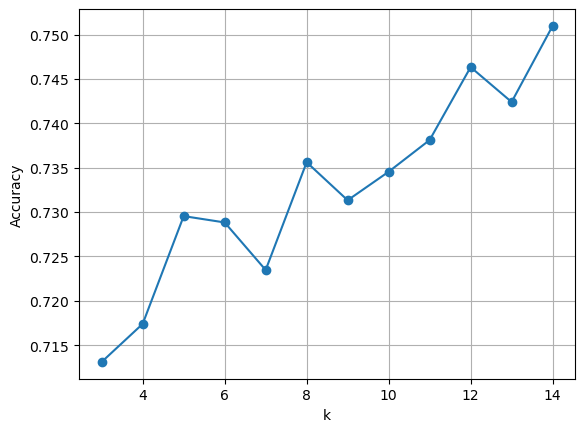

In [120]:
# Lets plot a graph to find highest accuracy score of given k
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.grid()

In [121]:
# Lets create knn model for 3 neighbors
knn_model=KNeighborsClassifier(n_neighbors=3,metric='euclidean')
knn_model.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [122]:
# Make predictions on the test set
knn_y_pred=knn_model.predict(x_test)

In [123]:
# Evaluate the model
print("KNN Model:")
print("Accuracy:", accuracy_score(y_test, knn_y_pred))
print(classification_report(y_test, knn_y_pred))

KNN Model:
Accuracy: 0.7131118256520186
              precision    recall  f1-score   support

           0       0.70      0.65      0.67      1286
           1       0.72      0.77      0.74      1513

    accuracy                           0.71      2799
   macro avg       0.71      0.71      0.71      2799
weighted avg       0.71      0.71      0.71      2799



## SVM Model

In [124]:
from sklearn.svm import SVC
svm_model=SVC(kernel='linear')
svm_model.fit(x_train,y_train)

SVC(kernel='linear')

In [125]:
# Make predictions on the test set
svm_y_pred=svm_model.predict(x_test)

In [126]:
# Evaluate the model
print("SVM Model:")
print("Accuracy:", accuracy_score(y_test, svm_y_pred))
print(classification_report(y_test, svm_y_pred))

SVM Model:
Accuracy: 0.7745623436941765
              precision    recall  f1-score   support

           0       0.77      0.72      0.75      1286
           1       0.78      0.82      0.80      1513

    accuracy                           0.77      2799
   macro avg       0.77      0.77      0.77      2799
weighted avg       0.77      0.77      0.77      2799



## When comparing 5 models, accuracy is higher for RandomForestClassifier

### Hyperparameter tuning for RandomForestClassifier model

In [144]:
param_grid = {
	'n_estimators': [25, 50, 100, 150],
	'max_features': ['sqrt', 'log2', None],
	'max_depth': [3, 6, 9],
	'max_leaf_nodes': [3, 6, 9],
}


In [147]:
#Hyperparameter Tuning- GridSearchCV
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
grid_search = GridSearchCV(RandomForestClassifier(),param_grid=param_grid)
grid_search.fit(x_train, y_train)
print(grid_search.best_estimator_)


RandomForestClassifier(max_depth=6, max_leaf_nodes=9, n_estimators=150)


In [148]:
#Update the Model
#Now we will update the parameters of the model by those which are obtained by using GridSearchCV.

In [153]:
model_grid = RandomForestClassifier(max_depth=6,max_leaf_nodes=9,n_estimators=150)
model_grid.fit(x_train, y_train)
y_pred_grid = model_grid.predict(x_test)
print(classification_report(y_pred_grid, y_test))


              precision    recall  f1-score   support

           0       0.73      0.81      0.77      1162
           1       0.85      0.79      0.82      1637

    accuracy                           0.80      2799
   macro avg       0.79      0.80      0.80      2799
weighted avg       0.80      0.80      0.80      2799



In [149]:
#Hyperparameter Tuning- RandomizedSearchCV



In [151]:
random_search = RandomizedSearchCV(RandomForestClassifier(),param_grid)
random_search.fit(x_train, y_train)
print(random_search.best_estimator_)


RandomForestClassifier(max_depth=6, max_leaf_nodes=9, n_estimators=25)


In [154]:
model_random = RandomForestClassifier(max_depth=6,max_leaf_nodes=9,n_estimators=25)
model_random.fit(x_train, y_train)
y_pred_rand = model_random.predict(x_test)
print(classification_report(y_pred_rand, y_test))


              precision    recall  f1-score   support

           0       0.73      0.81      0.77      1168
           1       0.85      0.79      0.82      1631

    accuracy                           0.80      2799
   macro avg       0.79      0.80      0.79      2799
weighted avg       0.80      0.80      0.80      2799



## Hyperparameter tuning for RandomForestClassifier model didn't bring any sufficient result


### Hence the best model selected is 

In [156]:
print("Random Forest:")
print("Accuracy:", accuracy_score(y_test, rf_y_pred))
print(classification_report(y_test, rf_y_pred))

Random Forest:
Accuracy: 0.8542336548767417
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1286
           1       0.85      0.88      0.87      1513

    accuracy                           0.85      2799
   macro avg       0.85      0.85      0.85      2799
weighted avg       0.85      0.85      0.85      2799

